# GeoBench WindTurbine

In [12]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchWindTurbineDataModule
from geobench_v2.datasets import GeoBenchWindTurbine
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PROJECT_ROOT = Path("../../")

In [3]:
band_order = GeoBenchWindTurbine.band_default_order

datamodule = GeoBenchWindTurbineDataModule(
    img_size=256,
    batch_size=16,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "wind_turbine",
    band_order=band_order,
    data_normalizer=torch.nn.Identity(),  # we do custom normalization in the tutorial
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


In [4]:
# sample_dist_fig = datamodule.visualize_geospatial_distribution()

### Raw Image Statistics

Computed over the training dataset.

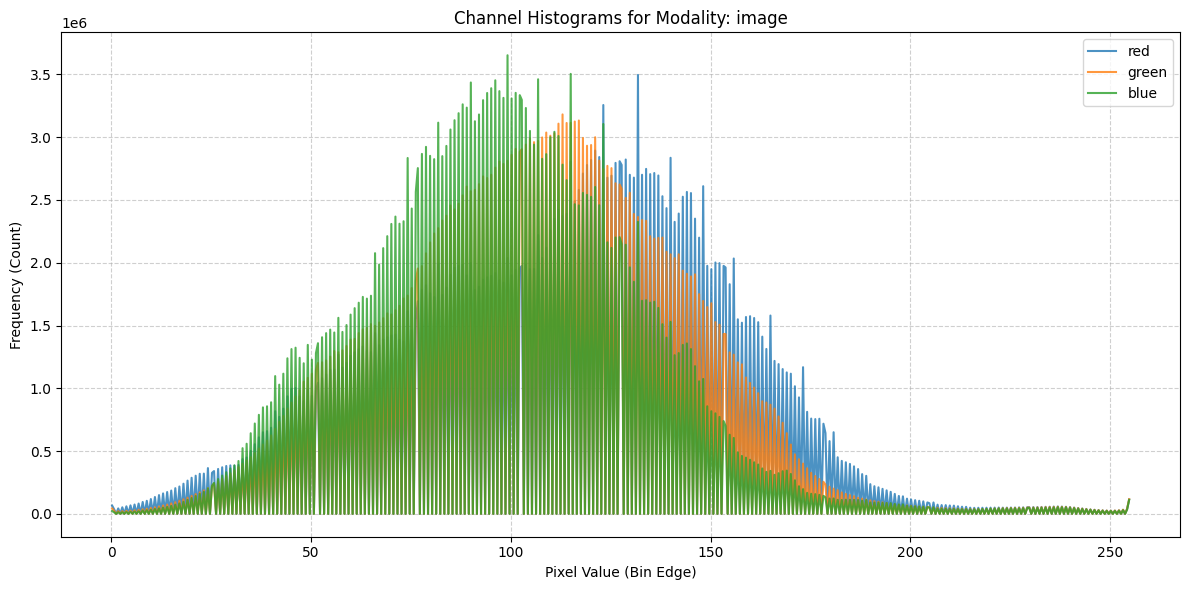

In [5]:
fig = plot_channel_histograms(
    PROJECT_ROOT
    / "geobench_v2/generate_benchmark/dataset_stats_satmae/wind_turbine/wind_turbine_stats.json"
)

## Target Statistics

In [6]:
fig = visualize_object_detection_target_statistics(
    PROJECT_ROOT
    / "geobench_v2/generate_benchmark/dataset_stats_satmae/wind_turbine/wind_turbine_stats.json",
    "WindTurbine",
)

NameError: name 'visualize_object_detection_target_statistics' is not defined

### Raw Batch Statistics

[<Figure size 1200x500 with 1 Axes>]

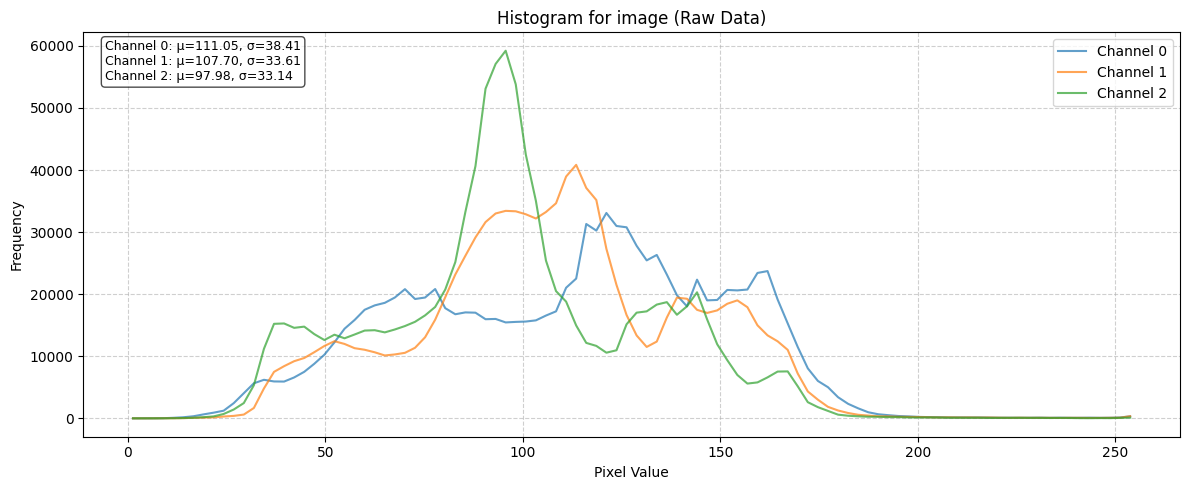

In [7]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

### Effect of Normalization Schemes

In [8]:
STATS_SATMAE_DIR = os.path.join(
    PROJECT_ROOT, "geobench_v2", "generate_benchmark", "dataset_stats_satmae"
)
STATS_WITH_CLIP_DIR = os.path.join(
    PROJECT_ROOT, "geobench_v2", "generate_benchmark", "dataset_stats_clip_rescale"
)

direct_stats_path = os.path.join(STATS_WITH_CLIP_DIR, "wind_turbine", "wind_turbine_stats.json")
satmae_stats_path = os.path.join(
    STATS_SATMAE_DIR, "wind_turbine", "wind_turbine_stats.json"
)


clip_z_normalizer = ZScoreNormalizer(direct_stats_path, band_order)
satmae_normalizer = SatMAENormalizer(satmae_stats_path, band_order)

### Effect of SatMAE Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>]

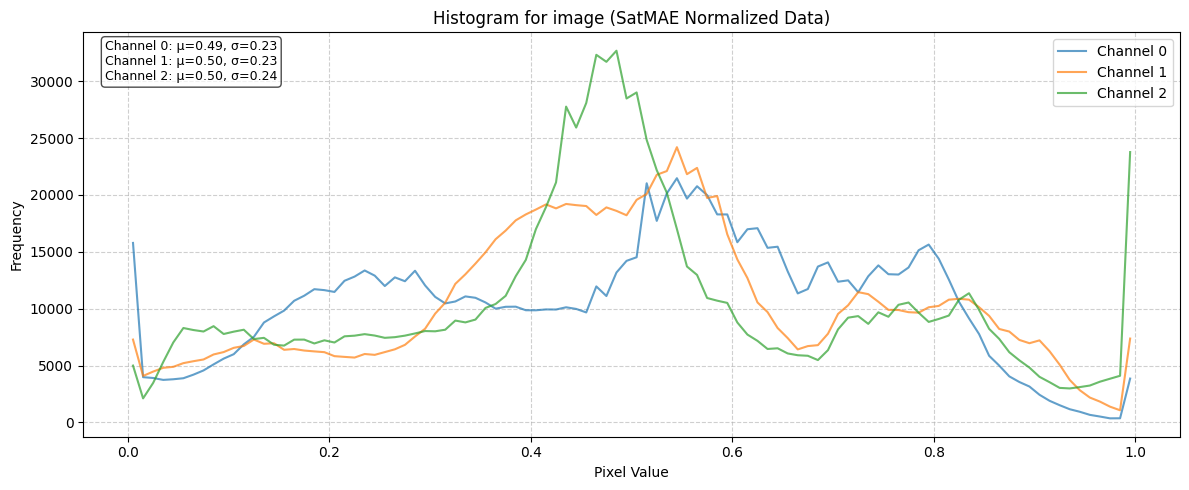

In [9]:
satmae_normalized_batch = satmae_normalizer(raw_batch)
satmae_batch_stats = compute_batch_histograms(satmae_normalized_batch, n_bins=100)
sat_mae_norm_fig = plot_batch_histograms(
    satmae_batch_stats, band_order, title_suffix=" (SatMAE Normalized Data)"
)
sat_mae_norm_fig

### Effect of ClipZ Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>]

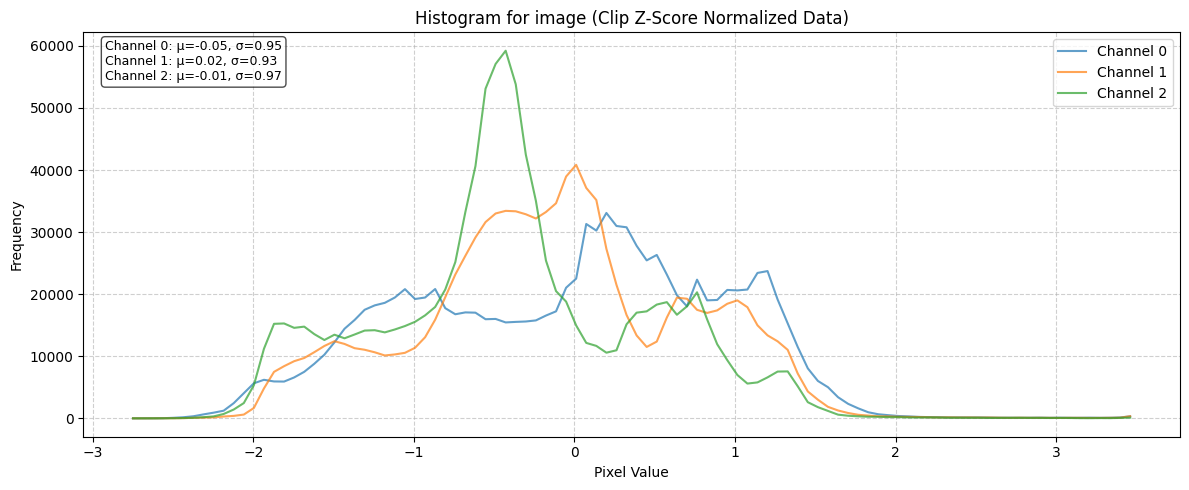

In [10]:
clip_z_normalized_batch = clip_z_normalizer(raw_batch)
clip_z_batch_stats = compute_batch_histograms(clip_z_normalized_batch, n_bins=100)
clip_z_norm_fig = plot_batch_histograms(
    clip_z_batch_stats, band_order, title_suffix=" (Clip Z-Score Normalized Data)"
)
clip_z_norm_fig

## Visualize Batch Data

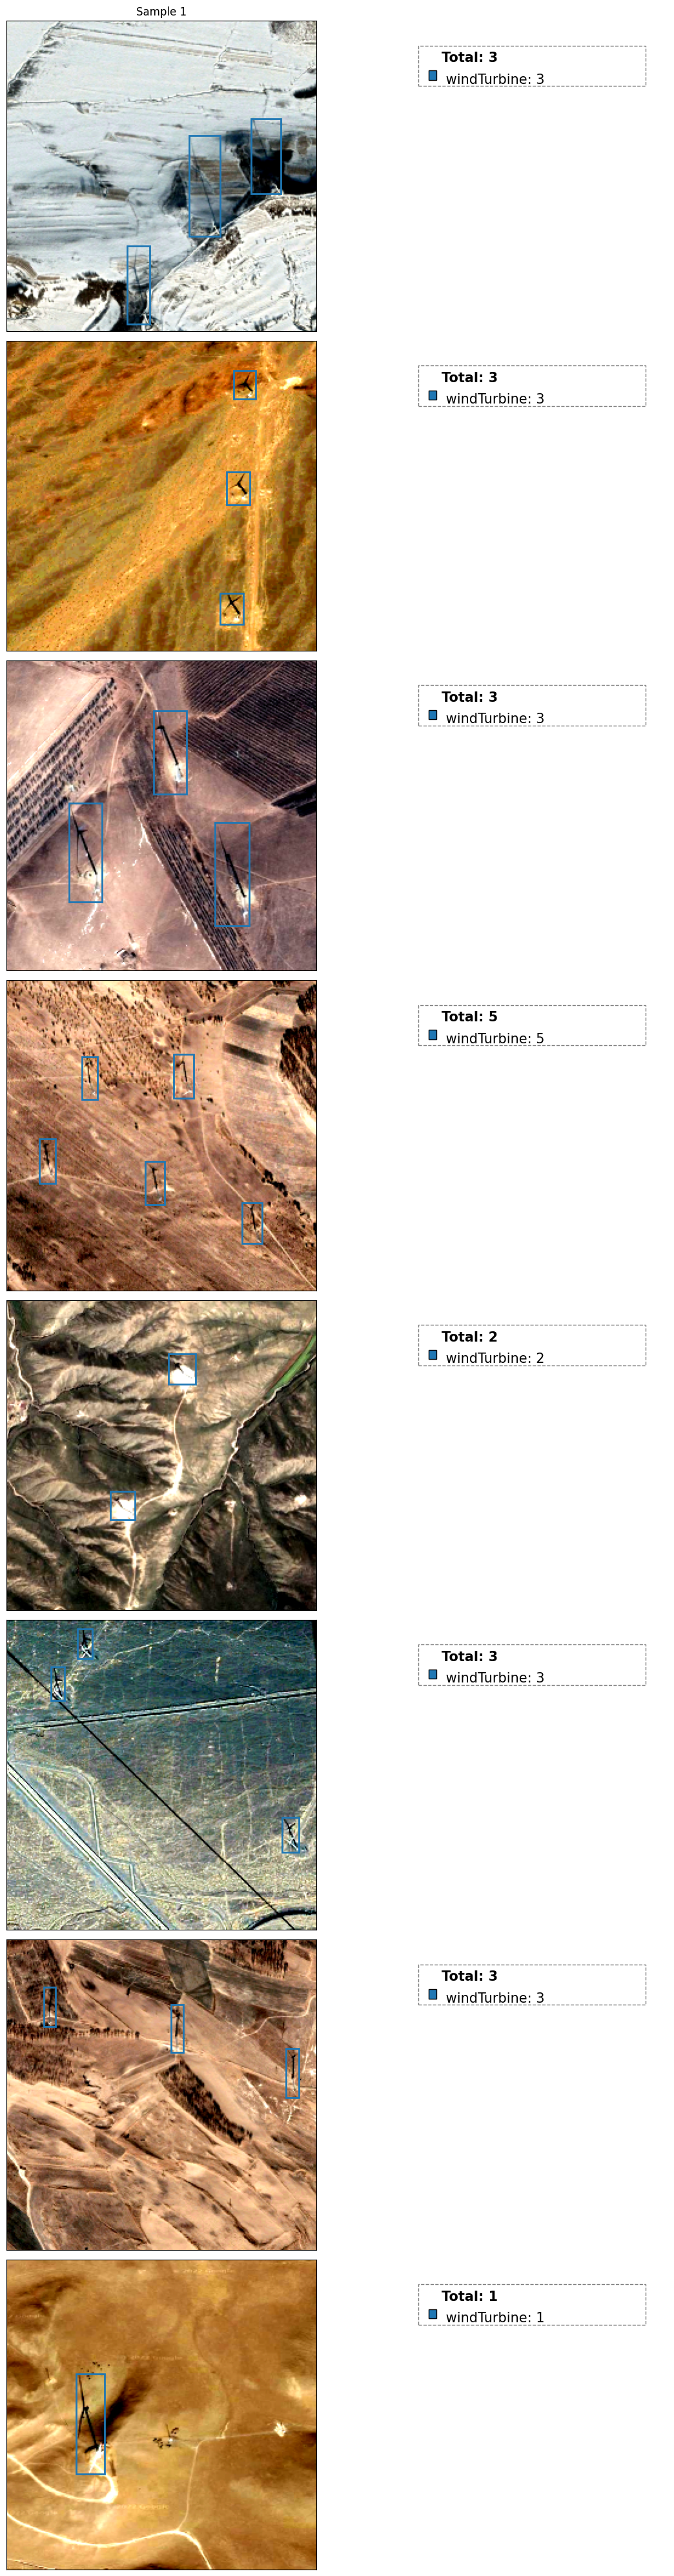

In [13]:
fig, batch = datamodule.visualize_batch()